In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('hw2.csv')
print(data.columns.tolist())

['Отметка времени', 'Итоговая оценка за экзамен по ТОЭ', 'С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)', 'Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?', 'Оценка по физике в школе', 'Оценка по физике в последнем семестре?', 'Оценка за ИДЗ по ТОЭ за семестр ', 'Оценка по лабораторным ТОЭ', 'Вели конспект по занятиям? (лекции и/или практики)', 'Выходили к доске на практике?', 'Оценка за последнюю контрольную работу по ТОЭ', 'В течении предыдущего семестра были трудоустроены и/или проходили стажировку?', 'Если работали/проходили стажировку, то какая ставка (загрузка):', 'Где проживаете?', 'Есть кот дома? (в месте, где сейчас живете)', 'Есть родной брат/сестра?', 'Гражданство', 'Сколько в среднем играли в прошлом семестре? Укажите число в часах', 'Была ли стипендия в 3 семестре?', 'Оцените свое ментальное здоровье в прошлом семестре', 'Оцените, на

In [2]:
data = data.dropna(subset=['Итоговая оценка за экзамен по ТОЭ'])
data = data[data['С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)'] == 1]

In [3]:
print(data.isna().sum())

Отметка времени                                                                                                            0
Итоговая оценка за экзамен по ТОЭ                                                                                          0
С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)        0
Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?    0
Оценка по физике в школе                                                                                                   0
Оценка по физике в последнем семестре?                                                                                     1
Оценка за ИДЗ по ТОЭ за семестр                                                                                            0
Оценка по лабораторным ТОЭ                                                                                                 0


In [4]:
data['Оценка по физике в последнем семестре?'] = data['Оценка по физике в последнем семестре?'].bfill()

In [5]:
print(data.dtypes)

Отметка времени                                                                                                             object
Итоговая оценка за экзамен по ТОЭ                                                                                          float64
С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)        float64
Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?      int64
Оценка по физике в школе                                                                                                     int64
Оценка по физике в последнем семестре?                                                                                     float64
Оценка за ИДЗ по ТОЭ за семестр                                                                                            float64
Оценка по лабораторным ТОЭ                                                         

In [6]:
data_numeric = data.select_dtypes(include=[np.number])
correlation_matrix = data_numeric.corr()
print(correlation_matrix)
print(data_numeric.columns)

                                                    Итоговая оценка за экзамен по ТОЭ  \
Итоговая оценка за экзамен по ТОЭ                                            1.000000   
С какого раза вы сдали экзамен по ТОЭ (если улу...                                NaN   
Регулярность посещения занятий. Оцените процент...                           0.411458   
Оценка по физике в школе                                                    -0.298396   
Оценка по физике в последнем семестре?                                       0.355819   
Оценка за ИДЗ по ТОЭ за семестр                                              0.486477   
Оценка по лабораторным ТОЭ                                                   0.432222   
Оценка за последнюю контрольную работу по ТОЭ                                0.235883   
Если работали/проходили стажировку, то какая ст...                          -0.196430   
Оцените свое ментальное здоровье в прошлом семе...                          -0.249834   
Оцените, насколько бы

In [7]:
selected_features = ['Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?',
                     'Оценка по физике в последнем семестре?', 'Оценка за ИДЗ по ТОЭ за семестр ', 
                     'Оценка по лабораторным ТОЭ', 'Оценка за последнюю контрольную работу по ТОЭ',
                     'Оцените свое ментальное здоровье в прошлом семестре',
                     'Оцените, насколько были истощены (уставши) к началу сессии']

## Строим модель

In [8]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data_numeric[selected_features]
y = data_numeric['Итоговая оценка за экзамен по ТОЭ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_clipped = np.clip(y_pred, 0, 5)

# Проверка результатов до и после обрезки оценки до 5.0
print("Предсказанные значения до обрезки:", y_pred)
print("Предсказанные значения после обрезки:", y_pred_clipped)

# Оценка модели с обрезанными предсказаниями
mse = mean_squared_error(y_test, y_pred_clipped)
r2 = r2_score(y_test, y_pred_clipped)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

Предсказанные значения до обрезки: [2.87935237 2.04140691 5.35381796 4.91411826 3.30535174 4.0932732
 3.89177154]
Предсказанные значения после обрезки: [2.87935237 2.04140691 5.         4.91411826 3.30535174 4.0932732
 3.89177154]
MSE: 0.6923144045182134
R²: 0.002252769959045331


In [9]:
joblib.dump(model, 'toe_model.pkl')
print("Модель сохранена в 'toe_model.pkl'")

Модель сохранена в 'toe_model.pkl'


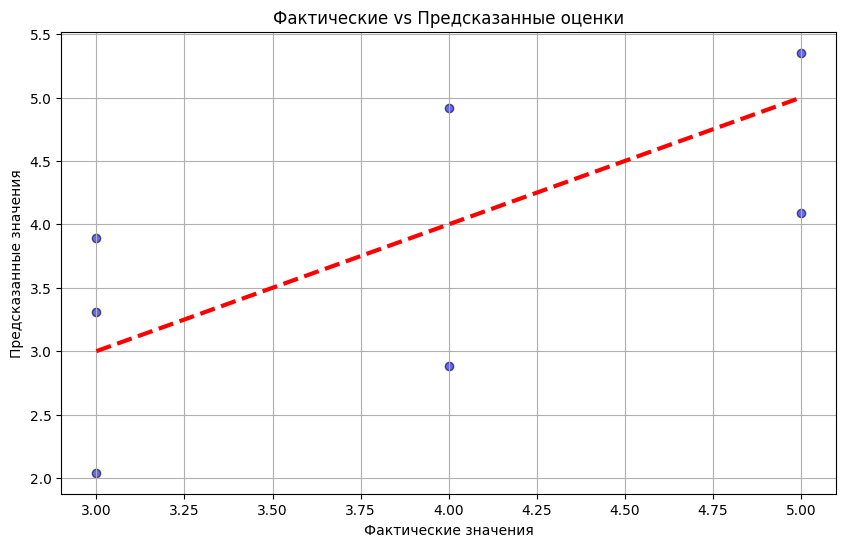

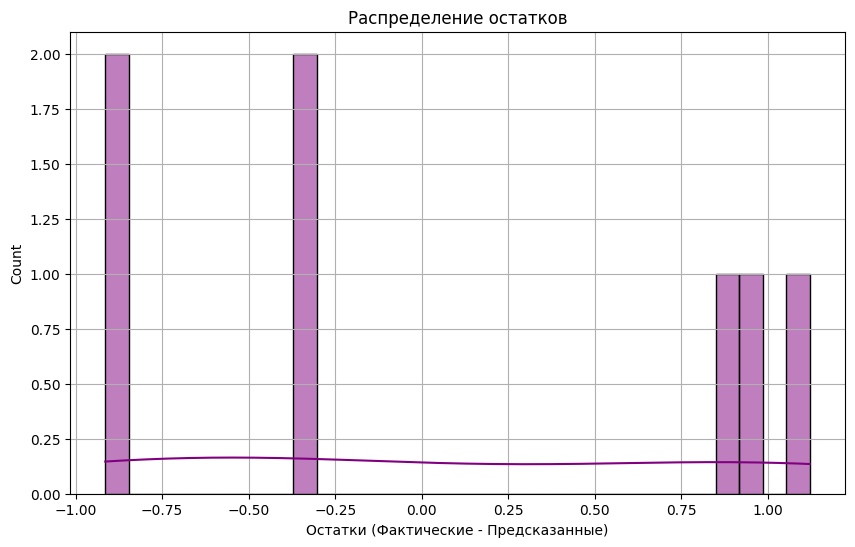

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# График фактических значений и предсказанных
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные оценки')
plt.grid(True)
plt.show()

# График остатков (ошибок)
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple', edgecolor='k', bins=30)
plt.title('Распределение остатков')
plt.xlabel('Остатки (Фактические - Предсказанные)')
plt.grid(True)
plt.show()

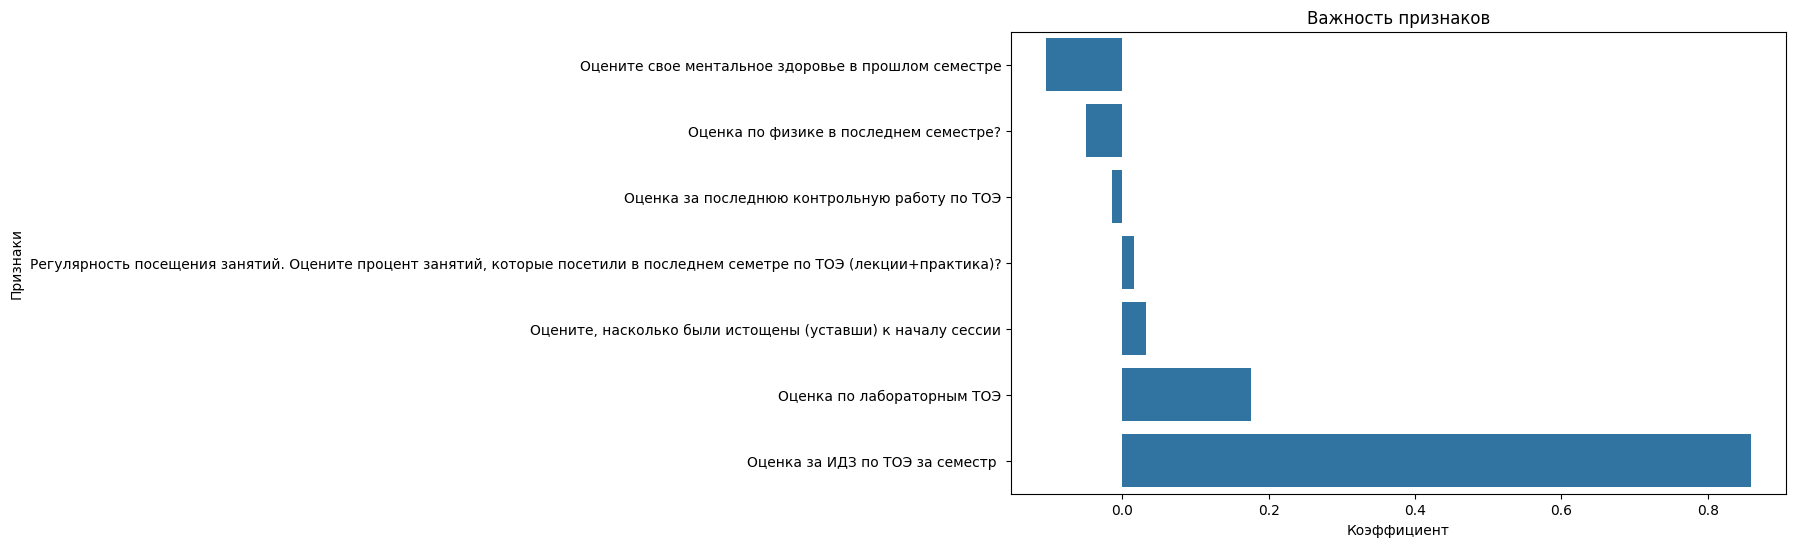

In [11]:
import seaborn as sns

coefficients = model.coef_

importance = pd.Series(coefficients, index=selected_features)
importance = importance.sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index)
plt.title('Важность признаков')
plt.xlabel('Коэффициент')
plt.ylabel('Признаки')
plt.show()


### делаем вывод - ментальное здоровье неважно, а идз нужно делать